In [38]:
##project 3 - Data visualization using python

from IPython import display
import pandas as pd
import datetime as dt
import seaborn as sb
import pyodbc 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## importing differnt servers to use sql, Data analysis tools & Visual tools

In [39]:
## creat view list

views = ['UnsoldProducts','NonOrderingCustomers','MOST_PAYING_CUSTOMERS',
         'HumanResources','LastOrders','BiggestOrderOfTheYear',
         'OrdersByMonthOfTheYear','TotalOrdersPriceByYear','EmployeesSenoiority', 'MostPaying']

In [40]:
## Connecting my ssms to the script
conn_str = (
    r'DRIVER={SQL Server};'
    r'SERVER=LAPTOP-VB103OLC\SQLEXPRESS;'  ##change to your SQL server name
    r'DATABASE=AdventureWorks2022;'  
    r'Trusted_Connection=yes;'
)

## creating view list based on my views from SQL AdventureWorks2022
views = ['UnsoldProducts', 'NonOrderingCustomers', 'MOST_PAYING_CUSTOMERS',
         'HumanResources', 'LastOrders', 'BiggestOrderOfTheYear',
         'OrdersByMonthOfTheYear', 'TotalOrdersPriceByYear', 'EmployeesSenoiority','MostPaying']

## function for loading the views to df
def load_all_views(view_list, connection_string):
    conn = pyodbc.connect(connection_string)
    dataframes = {}
    
    for view in view_list:
        query = f"SELECT * FROM {view}"
        df = pd.read_sql(query, conn)
        dataframes[view] = df
        print(f"Loaded data for {view}")

    conn.close()
    return dataframes

## reading & testing the views in the dataframe
dataframes = load_all_views(views, conn_str)

# ## presenting View to check
view_name = 'UnsoldProducts'
if view_name in dataframes:
    print(f"\nData from {view_name}:")
    print(dataframes[view_name].head())
else:
    print(f"{view_name} not found in loaded views.")

C:\Users\Roe Caspi\AppData\Local\Temp\ipykernel_9104\1092191635.py:21: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Loaded data for UnsoldProducts
Loaded data for NonOrderingCustomers
Loaded data for MOST_PAYING_CUSTOMERS
Loaded data for HumanResources
Loaded data for LastOrders
Loaded data for BiggestOrderOfTheYear
Loaded data for OrdersByMonthOfTheYear
Loaded data for TotalOrdersPriceByYear
Loaded data for EmployeesSenoiority
Loaded data for MostPaying

Data from UnsoldProducts:
   ProductID                   Name Color  ListPrice  Size
0          1        Adjustable Race  None        0.0  None
1          2           Bearing Ball  None        0.0  None
2          3        BB Ball Bearing  None        0.0  None
3          4  Headset Ball Bearings  None        0.0  None
4        316                  Blade  None        0.0  None


In [41]:
##second check for reading the df views dictionary
print(dataframes['TotalOrdersPriceByYear'].head())

   YEAR MONTH   Sum_price     Cum_SUM  A
0  2011     5   503805.92   503805.92  0
1  2011     6   458910.82   962716.74  0
2  2011     7  2044600.00  3007316.75  0
3  2011     8  2495816.73  5503133.48  0
4  2011     9   502073.85  6005207.32  0


In [42]:
df = dataframes

## I'll start analyazing the data with different graphical displays
## I will go over sales department, HR & customers

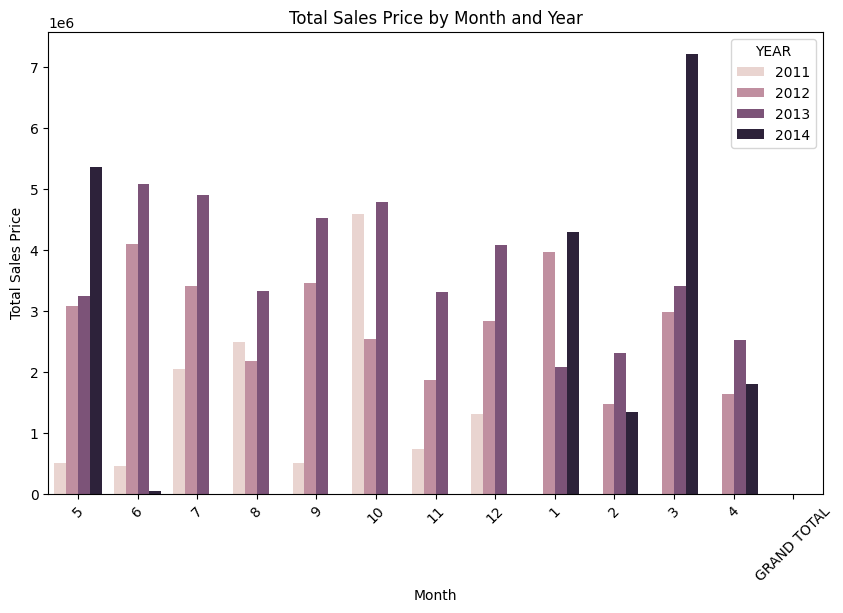

In [43]:
plt.figure(figsize=(10, 6))
sb.barplot(x='MONTH', y='Sum_price', hue='YEAR', data=df['TotalOrdersPriceByYear'])
plt.xlabel('Month')
plt.ylabel('Total Sales Price')
plt.title('Total Sales Price by Month and Year')
plt.xticks(rotation=45)
plt.show()

In [44]:
## as you can see, from the beginning of 11' until May 14', the total sales of the company
## grew up & the strong months over the years were june, july, september & october
## exept for 2014 when the months of march & may were the strongest.
## this can also be seen in the heatmap below that shows from july 13' untill may 14' 
## the average order per monthe doubled itself.

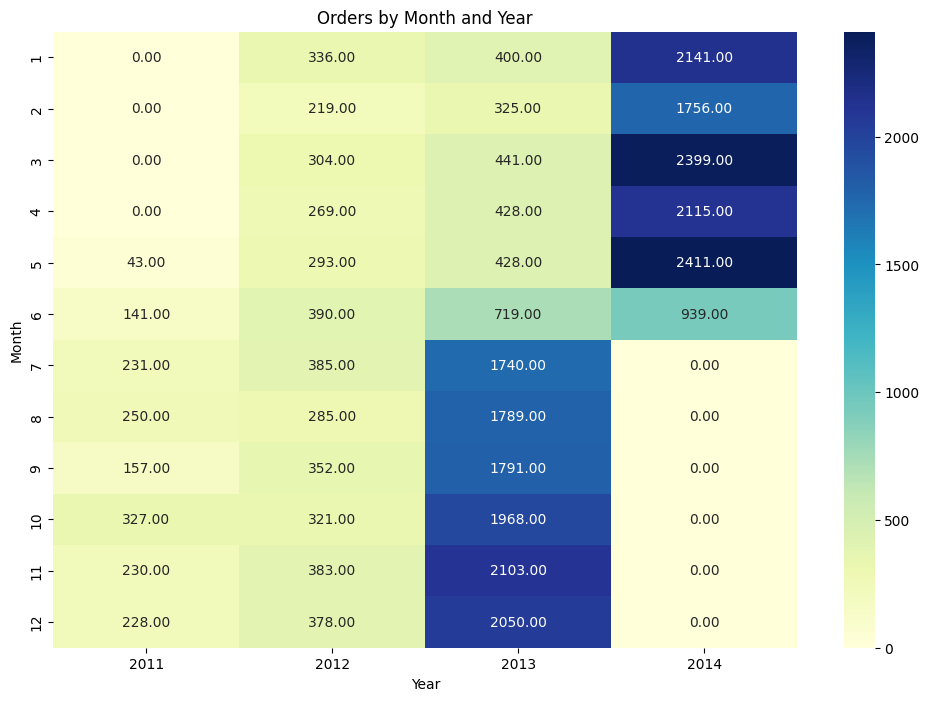

In [45]:
df_pivot = df['OrdersByMonthOfTheYear'].melt(id_vars=['Month'], var_name='Year', value_name='OrderCount')
df_pivot = df_pivot.pivot_table(index='Month', columns='Year', values='OrderCount')

# creating Heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(df_pivot, annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Orders by Month and Year')
plt.show()

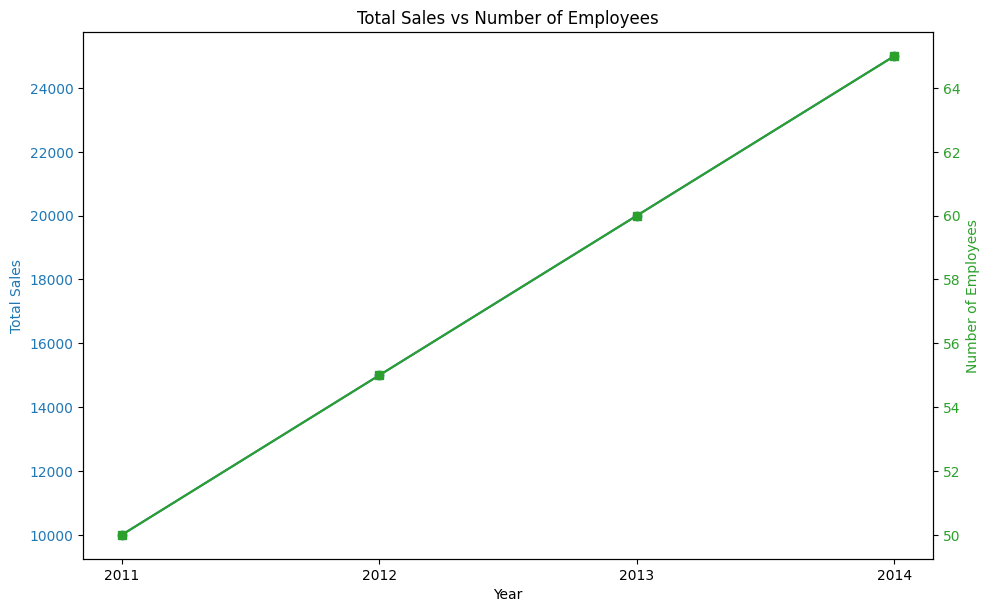

In [46]:
## creating line graph with two Y axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Y1 - sales sum
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales', color='tab:blue')
ax1.plot(years, total_sales, color='tab:blue', marker='o', label='Total Sales')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Y2 - number of employees
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Employees', color='tab:green')
ax2.plot(years, num_employees, color='tab:green', marker='s', label='Number of Employees')
ax2.tick_params(axis='y', labelcolor='tab:green')

# design
fig.tight_layout()
plt.title('Total Sales vs Number of Employees')
plt.show()

In [47]:
## compering the total sales to the number of employees in the company you can see
## an equal trend as the company grows, so do the sales.

In [48]:
import plotly.graph_objects as go

job_mapping = {
    'Sales Representative': 'Sales',
    'Sales Manager': 'Sales',
    'Sales Associate': 'Sales',
    'Sales': 'Sales',
    'Manager': 'Management',
    'Chief Executive Officer': 'Management',
    'Chief Financial Officer': 'Management',
    'Vice President of Engineering': 'Management',
    'Vice President of Production': 'Management',
    'Vice President of Sales': 'Management',
    'Engineer': 'Engineering',
    'Engineering': 'Engineering',
    'Design Engineer': 'Design',
    'Designer': 'Design',
    'Production Technician': 'Production',
    'Production Supervisor': 'Production',
    'Production Control Manager': 'Production',
    'HR Specialist': 'Human Resources',
    'Human Resources': 'Human Resources',
    'Technician': 'Production',
    'Supervisor': 'Production',
    'Control': 'Production',
    'Document Control Assistant': 'Production',
    'Document Control Manager': 'Production'
}
df['HumanResources']['JobCategory'] = df['HumanResources']['JobTitle'].map(job_mapping)
job_counts = df['HumanResources']['JobCategory'].value_counts()

# creating pie graph
fig = go.Figure(data=[go.Pie(labels=job_counts.index, values=job_counts.values, hole=.3)])

# Emphasis on sales department
fig.update_traces(pull=[0.1 if category == 'Sales' else 0 for category in job_counts.index],
                  textinfo='label+percent',
                  marker=dict(colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#ADFF2F', '#FF69B4']),
                  rotation=45)  

# design
fig.update_layout(title_text='Distribution of Job Categories',
                  showlegend=True,
                  legend_title="Job Categories")

fig.show()

In [49]:
## in the pie.graph yoe can see the the devision into work deapartments.
## as can be seen, more then 50% of the company are sales persons.
## the scatter below shows the top 100 customers of the company comparing there number
## of transactions to the average customer. the average transaction per customer is 
## 1 order worth 3491 USD when most of the big customers did more then 12 orders worth
## 30k - 100k USD. 
## the company has over 19k customers, but it is supported by only 100-300 strong customrs.
## The conclusion from comparing both graphs is that The company 
## needs to go through an optimization process in the field of sales.
## Reduction of sales personnel and a massive investment in the small customers.

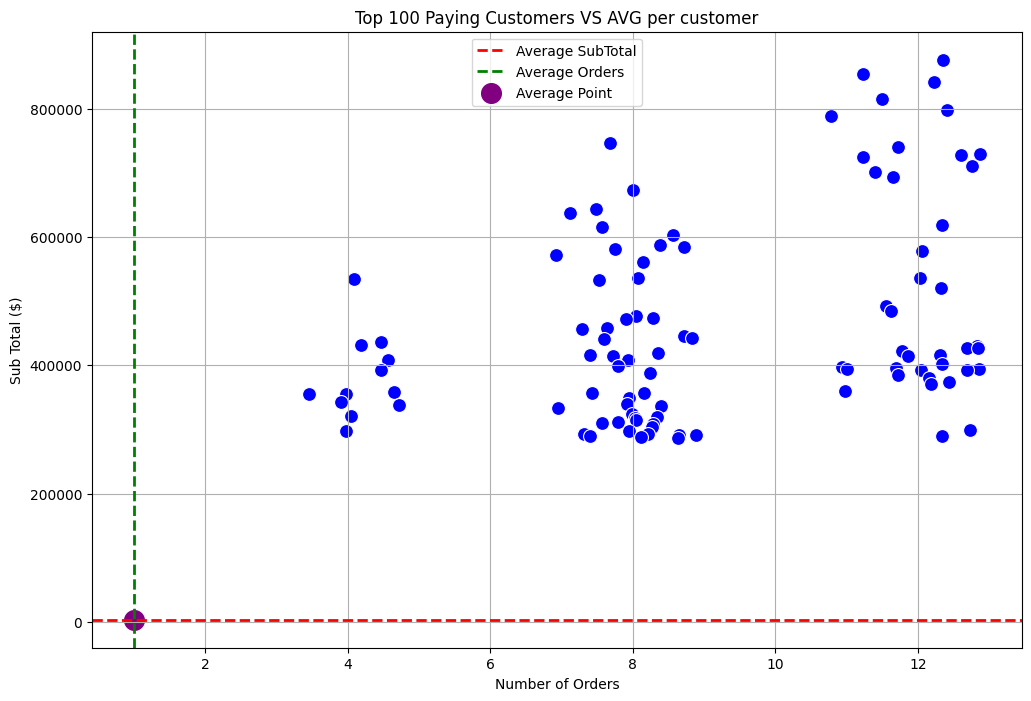

In [50]:
df_top_100_customers = df['MostPaying'].nlargest(100, 'SUM_TATAL')

# adding jitter to scatter the points on the graph
jittered_x = df_top_100_customers['NumOfOrders'] + np.random.normal(0, 0.5, size=len(df_top_100_customers))
jittered_y = df_top_100_customers['SUM_TATAL'] + np.random.normal(0, 1000, size=len(df_top_100_customers))

# creating scatter
plt.figure(figsize=(12, 8))
sb.scatterplot(x=jittered_x, y=jittered_y, s=100, color='blue')

# adding point & line to mark the customer average transaction
avg_orders = 1
avg_subtotal = 3491

plt.axhline(y=avg_subtotal, color='red', linestyle='--', linewidth=2, label='Average SubTotal')
plt.axvline(x=avg_orders, color='green', linestyle='--', linewidth=2, label='Average Orders')
plt.scatter(avg_orders, avg_subtotal, color='purple', s=200, marker='o', label='Average Point')

plt.xlabel('Number of Orders')
plt.ylabel('Sub Total ($)')
plt.title('Top 100 Paying Customers VS AVG per customer')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Roe Caspi\AppData\Local\Temp\ipykernel_9104\1798300856.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




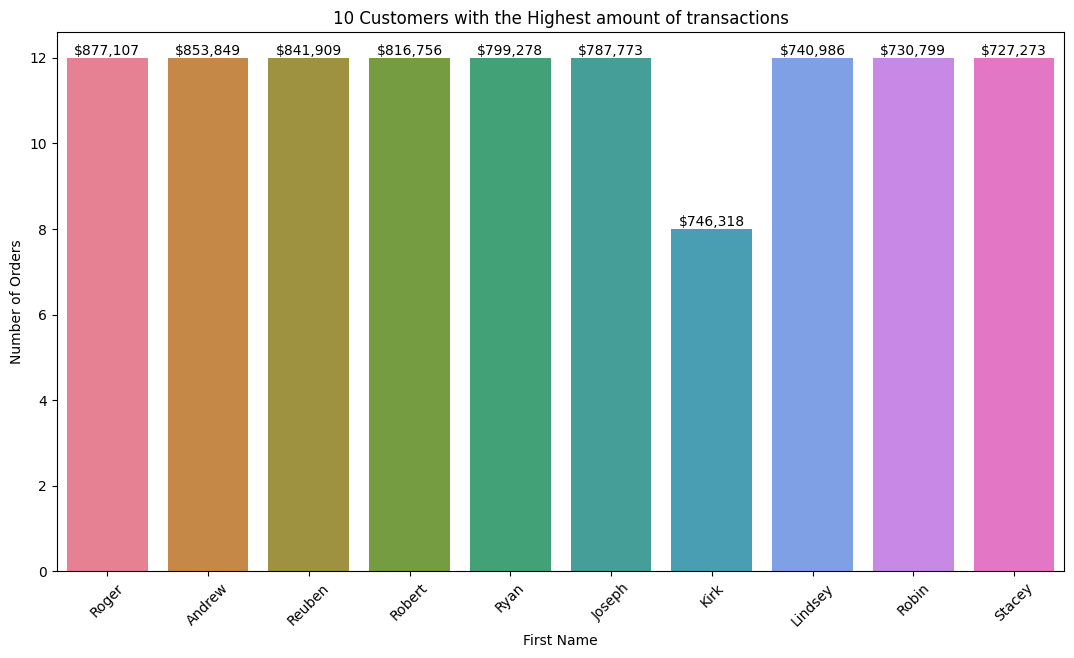

In [54]:
df_top_customers = df['MostPaying'].nlargest(10, 'SUM_TATAL')

# creating different colors for the columns
colors = sb.color_palette('husl', len(df_top_customers))

# creating bar graph
plt.figure(figsize=(13, 7))
bars = sb.barplot(x='FirstName', y='NumOfOrders', data=df_top_customers, palette=colors)
plt.xlabel('First Name')
plt.ylabel('Number of Orders')
plt.title('10 Customers with the Highest amount of transactions')
plt.xticks(rotation=45)

# adding the finle ammount at the top of the bar
for bar, total in zip(bars.patches, df_top_customers['SUM_TATAL']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${total:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [52]:
## this two graphs above & below shows the transactions of the 10 biggest customers over the 
## years and the biggest transaction the company did every year.

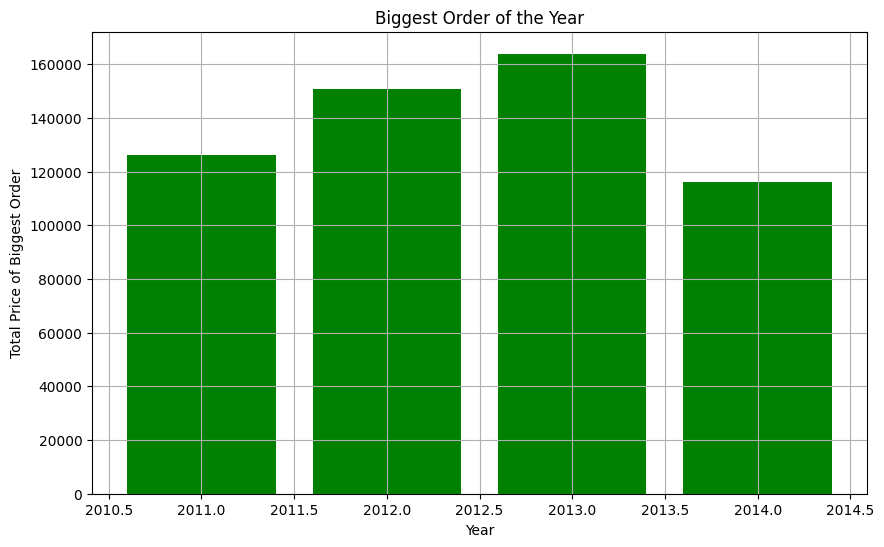

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(df['BiggestOrderOfTheYear']['YEAR'], df['BiggestOrderOfTheYear']['Total'], color='green')
plt.xlabel('Year')
plt.ylabel('Total Price of Biggest Order')
plt.title('Biggest Order of the Year')
plt.grid(True)
plt.show()